# Korean Medicine (KM) patient data analysis
19100720 Siheon Kim

20102115 Jeongmin Oh

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# CSV 파일 로드
data = pd.read_csv('./patient_data.csv')

data

,patient_id,km_diagnosis,gender,height,weight,bmi,systolic_blood_coagulation,diastolic_blood_pressure,job,education,...,fatigue_all_day,hypertension_diagnosis,diabetes_diagnosis,hyperlipidemia_diagnosis,general_health,blood_sugar,total_cholesterol,triglycerides,high_density_cholesterol,low_density_cholesterol
0,KDCT00001,2,2,158.0,55.0,22.0,120,80,2,5,...,0,1,1,1,3,104,219,72,60,128
1,KDCT00002,3,2,155.0,63.0,26.2,124,65,14,3,...,0,1,1,1,3,110,199,97,46,114
2,KDCT00003,2,1,160.0,59.0,23.0,121,75,3,3,...,0,1,1,1,3,79,216,88,49,132
3,KDCT00004,2,2,165.0,76.0,27.9,113,81,14,4,...,0,1,1,1,4,100,218,136,44,136
4,KDCT00005,1,1,165.0,70.0,25.7,129,72,8,2,...,0,1,1,1,2,92,186,61,33,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,KDCT00496,1,1,164.5,57.9,21.4,120,80,3,5,...,0,2,1,1,3,71,190,75,73,101
496,KDCT00497,2,2,157.2,41.9,17.0,110,70,3,5,...,0,1,1,1,3,74,246,86,104,117
497,KDCT00498,3,1,165.0,82.0,30.1,150,100,7,5,...,0,2,1,2,4,125,246,220,74,154
498,KDCT00499,3,1,171.1,68.3,23.3,110,80,7,4,...,0,2,1,1,2,85,172,127,49,109


/var/folders/03/dr0l0_yd6lvg0lc8k2xytr0r0000gn/T/ipykernel_1535/3075062595.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


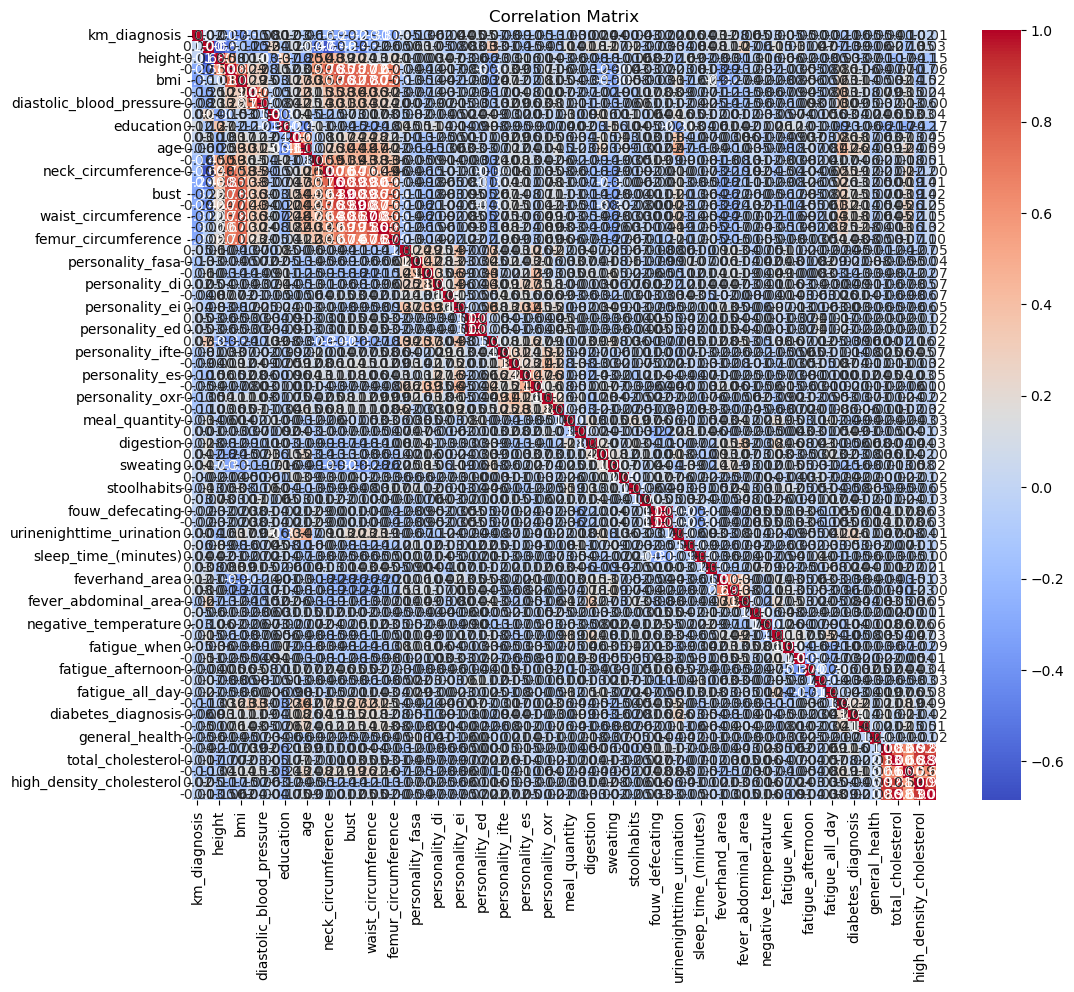

Highly correlated features to be considered for elimination:
                   Feature 1                   Feature 2  Correlation
7           folsa_defecation             fouw_defecating     0.999999
58            personality_ed              personality_ds     0.999756
25         total_cholesterol     low_density_cholesterol     0.979415
30   low_density_cholesterol           total_cholesterol     0.979415
26  high_density_cholesterol                 blood_sugar     0.918124
28  high_density_cholesterol     low_density_cholesterol     0.902346
31   low_density_cholesterol    high_density_cholesterol     0.902346
41                      bust                    rib_cage     0.889261
20                  rib_cage                        bust     0.889261
40                      bust        armpit_circumference     0.889231
48      armpit_circumference                        bust     0.889231
19                  rib_cage        armpit_circumference     0.885860
49      armpit_circumference 

/var/folders/03/dr0l0_yd6lvg0lc8k2xytr0r0000gn/T/ipykernel_1535/3075062595.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append({'Feature 1': feature,
/var/folders/03/dr0l0_yd6lvg0lc8k2xytr0r0000gn/T/ipykernel_1535/3075062595.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append({'Feature 1': feature,
/var/folders/03/dr0l0_yd6lvg0lc8k2xytr0r0000gn/T/ipykernel_1535/3075062595.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append({'Feature 1': feature,
/var/folders/03/dr0l0_yd6lvg0lc8k2xytr0r0000gn/T/ipykernel_1535/3075062595.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

In [15]:
# 상관관계 행렬 시각화
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 상관계수의 절댓값이 0.7 이상인 피쳐들을 제거할 후보로 표시
highly_correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.7:
            colname = corr_matrix.columns[i]
            highly_correlated_features.add(colname)

# 상관관계가 높은 피쳐들을 DataFrame으로 만들어 표시 (상관관계 값 기준으로 내림차순 정렬)
corr_df = pd.DataFrame(columns=['Feature 1', 'Feature 2', 'Correlation'])
for feature in highly_correlated_features:
    corr_list = corr_matrix[feature][abs(corr_matrix[feature]) >= 0.7].index.tolist()
    for corr_feature in corr_list:
        if corr_feature != feature:
            corr_df = corr_df.append({'Feature 1': feature,
                                      'Feature 2': corr_feature,
                                      'Correlation': corr_matrix.loc[feature, corr_feature]},
                                     ignore_index=True)

# 상관관계 값 기준으로 내림차순 정렬
corr_df_sorted = corr_df.sort_values(by='Correlation', ascending=False)

print("Highly correlated features to be considered for elimination:")
print(corr_df_sorted)

# eliminate할 피쳐를 5개씩 나눠서 표시
eliminate_features = corr_df_sorted['Feature 1'].unique()
num_cols = 5
num_rows = (len(eliminate_features) + num_cols - 1) // num_cols

print("Features to be eliminated:")
for i in range(num_rows):
    row = eliminate_features[i*num_cols:(i+1)*num_cols]
    print("\t".join(row))

# eliminate할 피쳐들 제거
data = data.drop(columns=eliminate_features)

In [16]:
# 'patient_id' 열은 제외하고 feature와 target 변수 선택
X = data.drop(['patient_id', 'km_diagnosis'], axis=1)
y = data['km_diagnosis']

In [17]:
# 범주형 변수들에 대해 원-핫 인코딩 수행
X = pd.get_dummies(X)
X


,gender,height,weight,systolic_blood_coagulation,job,education,marital_status,age,forehead_circumference,personality_bs,...,fatigue_morning,fatigue_afternoon,fatigue_night,fatigue_all_day,hypertension_diagnosis,diabetes_diagnosis,hyperlipidemia_diagnosis,general_health,blood_sugar,triglycerides
0,2,158.0,55.0,120,2,5,2,48.666,53.0,2,...,0,0,1,0,1,1,1,3,104,72
1,2,155.0,63.0,124,14,3,2,80.773,59.0,1,...,0,1,0,0,1,1,1,3,110,97
2,1,160.0,59.0,121,3,3,2,50.008,57.0,3,...,0,1,0,0,1,1,1,3,79,88
3,2,165.0,76.0,113,14,4,2,50.551,59.0,1,...,0,1,0,0,1,1,1,4,100,136
4,1,165.0,70.0,129,8,2,2,49.581,60.0,3,...,0,1,0,0,1,1,1,2,92,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,164.5,57.9,120,3,5,2,50.682,55.3,3,...,0,1,0,0,2,1,1,3,71,75
496,2,157.2,41.9,110,3,5,2,42.542,53.5,3,...,0,1,0,0,1,1,1,3,74,86
497,1,165.0,82.0,150,7,5,2,48.797,58.0,3,...,0,1,0,0,2,1,2,4,125,220
498,1,171.1,68.3,110,7,4,2,51.263,54.4,3,...,0,1,0,0,2,1,1,2,85,127


/var/folders/03/dr0l0_yd6lvg0lc8k2xytr0r0000gn/T/ipykernel_1535/3133393740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


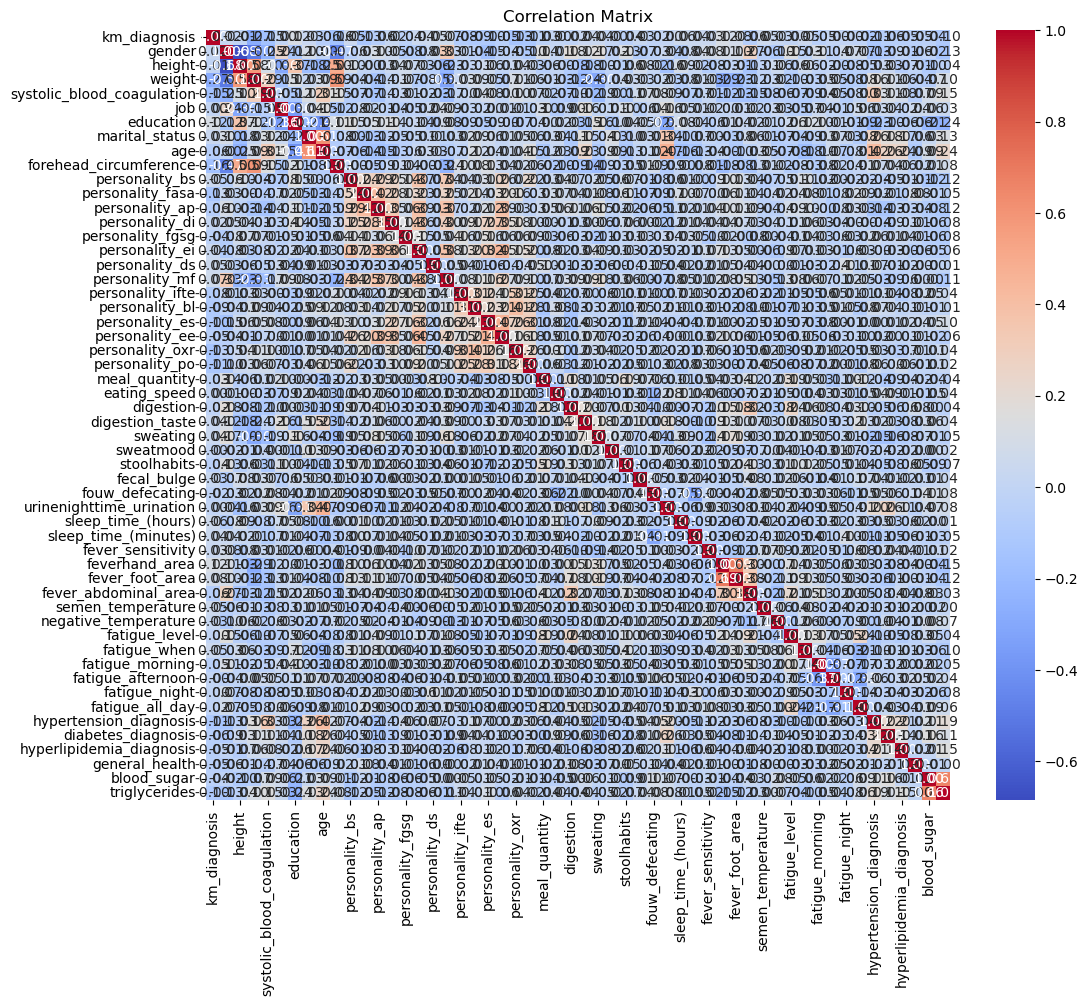

In [18]:
# 상관관계 행렬 시각화
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
# 학습용 데이터와 테스트용 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# 데이터 표준화 (numerical feature에 대해서만)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['number']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['number']))

In [21]:
# RFE를 사용한 특성 선택
model = LogisticRegression(max_iter=1000)
selector = RFE(model, n_features_to_select=10, step=1)
selector.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

In [22]:
# 선택된 특성 확인
selected_features = X_train.columns[selector.support_]
print("Selected features:", selected_features)


Selected features: Index(['gender', 'height', 'weight', 'education', 'personality_bs',
       'personality_ap', 'sweating', 'fever_abdominal_area',
       'diabetes_diagnosis', 'triglycerides'],
      dtype='object')


In [23]:
# 선택된 특성만 사용하여 모델 재학습
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)

/Users/siheon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [25]:
# 예측 및 평가
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.61      0.64        46
           2       0.45      0.39      0.42        23
           3       0.34      0.42      0.38        31

    accuracy                           0.50       100
   macro avg       0.49      0.47      0.48       100
weighted avg       0.52      0.50      0.51       100



In [26]:
# # Decision Tree 모델 생성 및 학습
# clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train, y_train)

In [27]:
# # 학습된 모델로 예측
# y_pred = clf.predict(X_test)


In [28]:
# # 모델 평가
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Classification Report:\n{report}')